# **DSCI 100 project - Group 24**

Group Members: Bhavya Mohan, Sherin Xierenayi, Jason Jonathan, Neha Menon

**Project Title: Predicting Diabetes**

**Introduction:**

Diabetes is a prevalent  diseases that is characterized by the targeting of insulin producing beta cells by immune cells. In the united states, 1.4 million people are diagnosed with the disease each year.  Type 1 diabetes is a genetic condition, however, type 2 diabetes is based on environmental factors. Therefore, early detection of type 2 diabetes is important to prevent the onset of the disease. In this project we hope to classify the occurrence of diabetes, based on easily mesurable factors so that individuals can evaluate their risk for the disease. We will use using a dataset by Rajput et al. where they collected data on physical attributes and diabetes.

**The Dataset that we will be using is from:**

Rajput, Minakshi R., and Sushant S. Khedgikar. 2022. “Diabetes Prediction and Analysis Using Medical Attributes: A Machine Learning Approach.” Journal of Xi’an University of Architecture & Technology 14(1):98–103. Doi: 10.37896/JXAT14.01/314405. 

### **Preliminary exploratory data analysis:**

In [5]:
# Loading Packages ----
library(ggplot2)
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(kknn)
library(gridExtra)

In [13]:
# Load data ----

## CLASS refers to diabetes where n is no diabetes, y is diabetic, and p is poteintially diabetic

url <- "https://raw.githubusercontent.com/jasonj17/DSCI100Project/main/Dataset%20of%20Diabetes%20.csv"
data <- read_csv(url)|>
    mutate(CLASS = as_factor(CLASS))
data

### Data is already in Tidy Format

Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Gender, CLASS
dbl (12): ID, No_Pation, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23,N
420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21,N
634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21,N
721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24,N
421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24,N
670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21,N


In [7]:
#### Make the training data
set.seed(1035)

data_split <- initial_split(data, prop = 0.75, strata = CLASS)  
data_train <- training(data_split)   
data_test <- testing(data_split)


In [8]:
### Lets first look at the number of observations in each class

num_obs <- nrow(data_train)

data_summary <- data_train |>
  group_by(CLASS)|>
  summarise(count=n(),
           percentage = n()/num_obs *100)
data_summary


CLASS,count,percentage
<fct>,<int>,<dbl>
N,75,10.013351
P,40,5.340454
Y,634,84.646195


In [9]:
###Mean Values for variables ----

mean_predictors <- data_train|>
summarize(across(AGE:BMI, mean))
mean_predictors

AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53.5474,5.088051,69.3765,8.350013,4.854633,2.332764,1.198358,2.611001,1.84259,29.59091


In [10]:
###-- number of empty data points

number_empty <- data_train |>
  is.na()|>
    sum()
number_empty

[1] 0

In [11]:
### Scaling the data

uc_recipe <- recipe(CLASS ~ AGE + Urea + Cr + HbA1c + Chol + TG + HDL + LDL + VLDL + BMI, data = data_train)

uc_recipe <- uc_recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
uc_recipe

scaled_diabetes <- bake(uc_recipe, data_train)


Recipe

Inputs:

      role #variables
   outcome          1
 predictor         10

Training data contained 749 data points and no missing data.

Operations:

Scaling for AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL,... [trained]
Centering for AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL,... [trained]

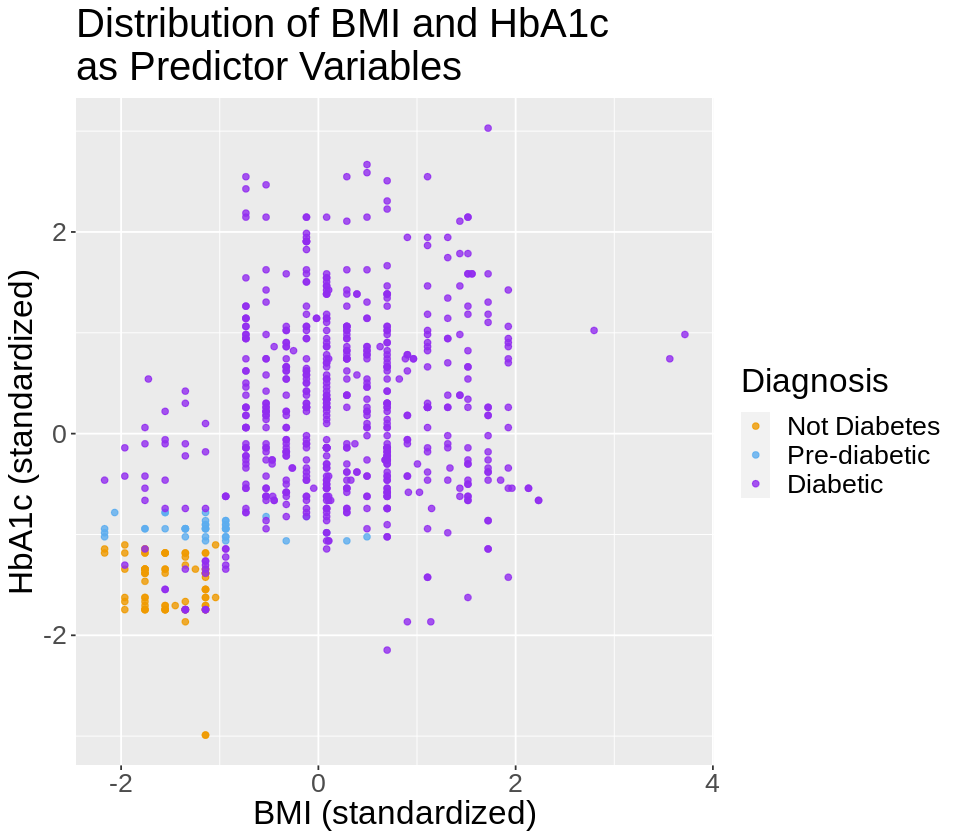

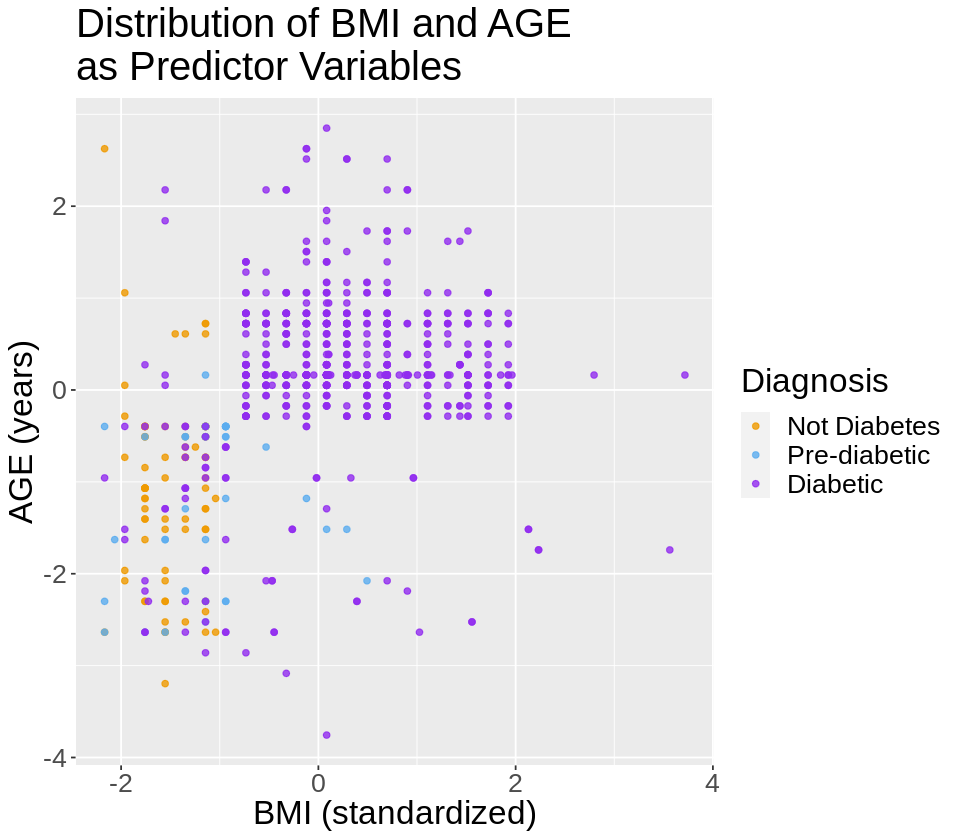

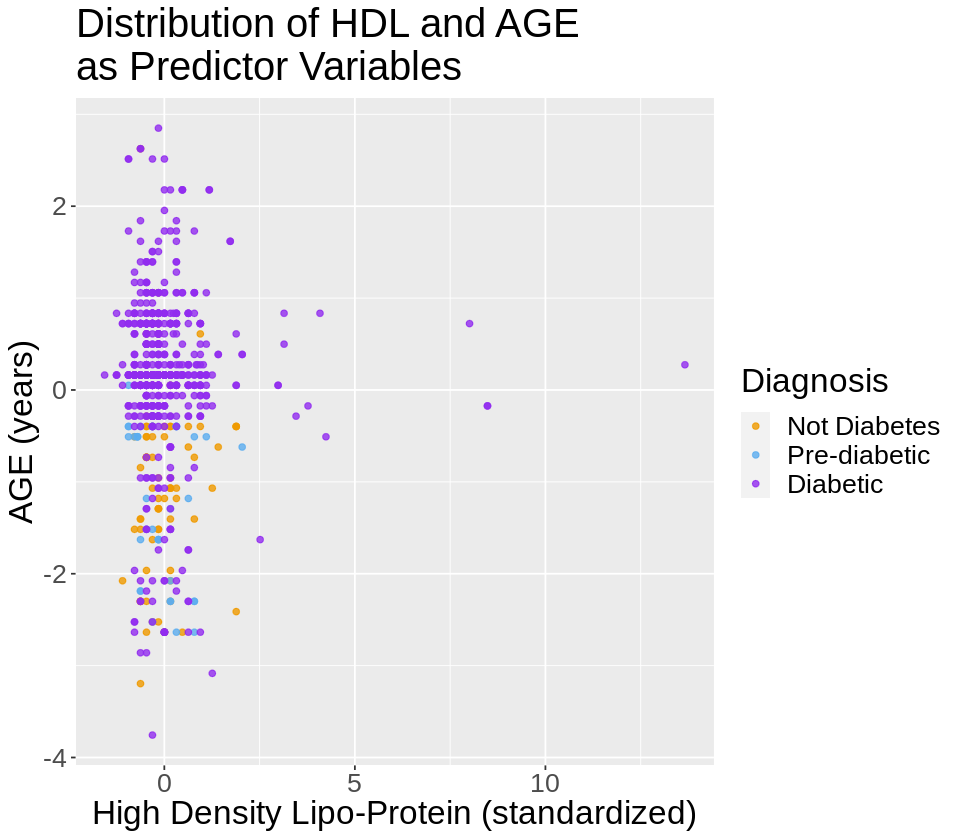

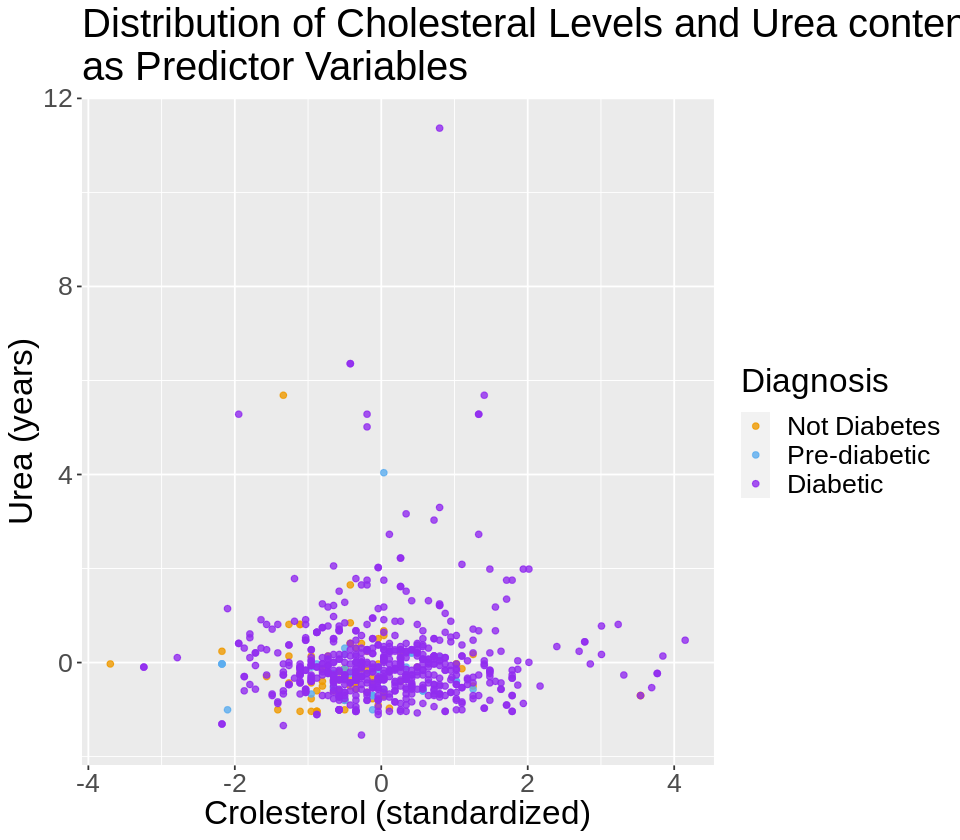

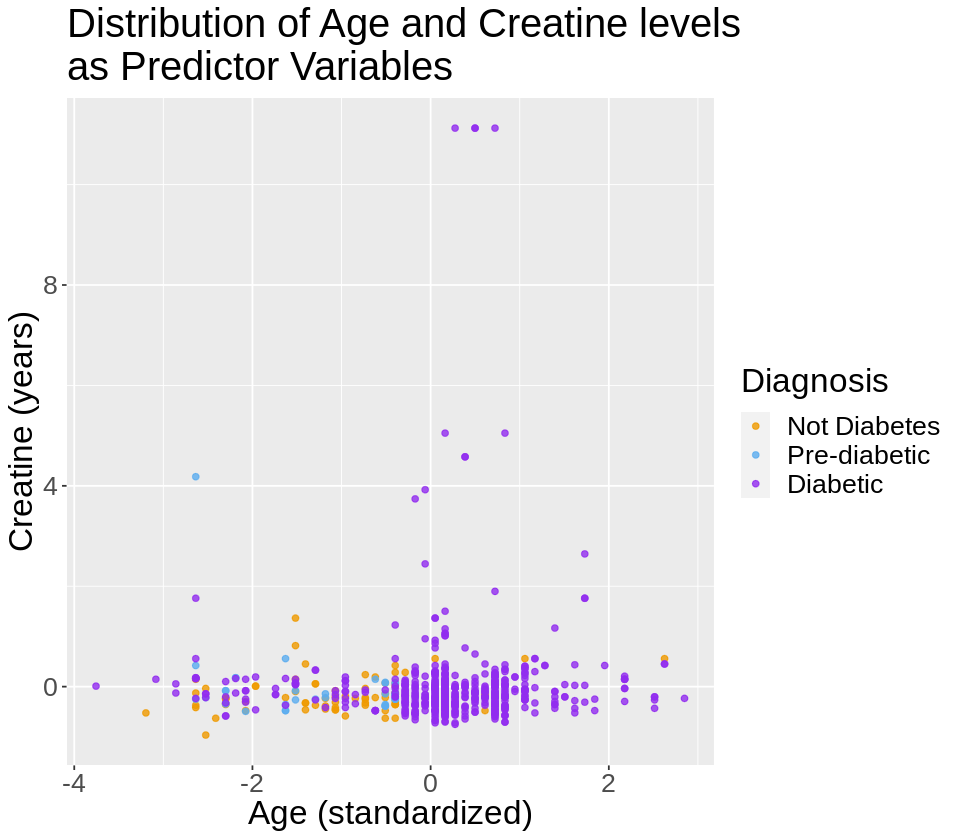

In [12]:
# Initial Graphs of different correlations----

options(repr.plot.width = 8, repr.plot.height = 7)

graph1 <- scaled_diabetes |>
    ggplot(aes(x = BMI, y = HbA1c, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "BMI (standardized)", y = "HbA1c (standardized)", color = "Diagnosis") +
    scale_color_manual(labels = c("Not Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of BMI and HbA1c \nas Predictor Variables')

graph2 <- scaled_diabetes |>
    ggplot(aes(x = BMI, y = AGE, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "BMI (standardized)", y = "AGE (years)", color = "Diagnosis") +
    scale_color_manual(labels = c("Not Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of BMI and AGE \nas Predictor Variables')

graph3 <- scaled_diabetes |>
    ggplot(aes(x = HDL, y = AGE, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "High Density Lipo-Protein (standardized)", y = "AGE (years)", color = "Diagnosis") +
    scale_color_manual(labels = c("Not Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of HDL and AGE \nas Predictor Variables')

graph4 <- scaled_diabetes |>
    ggplot(aes(x = Chol, y = Urea, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "Crolesterol (standardized)", y = "Urea (years)", color = "Diagnosis") +
    scale_color_manual(labels = c("Not Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of Cholesteral Levels and Urea content \nas Predictor Variables')

graph5 <- scaled_diabetes |>
    ggplot(aes(x = AGE, y = Cr, color = CLASS)) +
    geom_point(alpha = 0.8) +
    labs(x = "Age (standardized)", y = "Creatine (years)", color = "Diagnosis") +
    scale_color_manual(labels = c("Not Diabetes", "Pre-diabetic", "Diabetic"), values = c("orange2", "steelblue2", 'purple2')) +
    theme(text = element_text(size = 20)) +
    ggtitle('Distribution of Age and Creatine levels \nas Predictor Variables')


graph1
graph2
graph3
graph4
graph5


### **Methods:**

In the diabetes dataset, we will be using the columns, HBa1c and BMI for the analysis. We chose BMI as it is a standardized method to indicate an individuals health, in addition, the HBa1c was chosen as it shows an individuals average blood sugar over the last three months. Both of these serve as good indicators to predict if an individual is at risk for diabetes, pre-diabetic or diabetic. Based on the plots above, HBa1c and BMI have the most clear distribution in the plot and may provide the best classifier for the required analysis. 

One way of visualizing the results is by using different colors to represent three classifiers: diabetic, non-diabetic and pre-diabetic in a scatter plot. If the prediction matches the actual result, we’ll use one color to represent the points and if the prediction is false, another color will be used. To show how accurate our classifier is, we will compute its accuracy of prediction and construct a confusion matrix for our classifier which shows a table of predicted labels and correct labels.

### **Expected outcomes and significance:**

**What do you expect to find?**

It is expected that a model to predict diabetes based on diagnostic measurements such as blood glucose levels and BMI will be made. We expect the model to predict whether a patient has diabetes with sufficient accuracy. Additionally, it is expected that both BMI and HbA1c will have a poitive correlation with diabetes. 

**What impact could such findings have?**

This model could help individuals at home predict their risk for diabetes and poteintially take corrective measures. For example, if the model predicts that an individual has diabetes, then that individual would be be able to consult their doctor to properly diagnose and treat the disease.

**What future questions could this lead to?**

Developing this model to predict diabetes, may lead to further classifications to predict type 1 vs type 2 diabetes. Additionally, the model may allow us to further understand how the classifiers BMI and HbA1c relate to diabetes.

In [26]:
set.seed(2)

diabetes_recipe <- recipe(CLASS ~ BMI + HbA1c, 
                        data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

diabetes_vfold <- vfold_cv(data_train, v = 10, strata = CLASS)

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = diabetes_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9559744,10,0.007183695,Preprocessor1_Model01
6,accuracy,multiclass,0.9437771,10,0.008254061,Preprocessor1_Model02
11,accuracy,multiclass,0.9558146,10,0.006983761,Preprocessor1_Model03
16,accuracy,multiclass,0.9504983,10,0.006674665,Preprocessor1_Model04
21,accuracy,multiclass,0.9451460,10,0.008644307,Preprocessor1_Model05
26,accuracy,multiclass,0.9437947,10,0.008735558,Preprocessor1_Model06
31,accuracy,multiclass,0.9464618,10,0.008780954,Preprocessor1_Model07
36,accuracy,multiclass,0.9438303,10,0.008252930,Preprocessor1_Model08
41,accuracy,multiclass,0.9398298,10,0.007609107,Preprocessor1_Model09


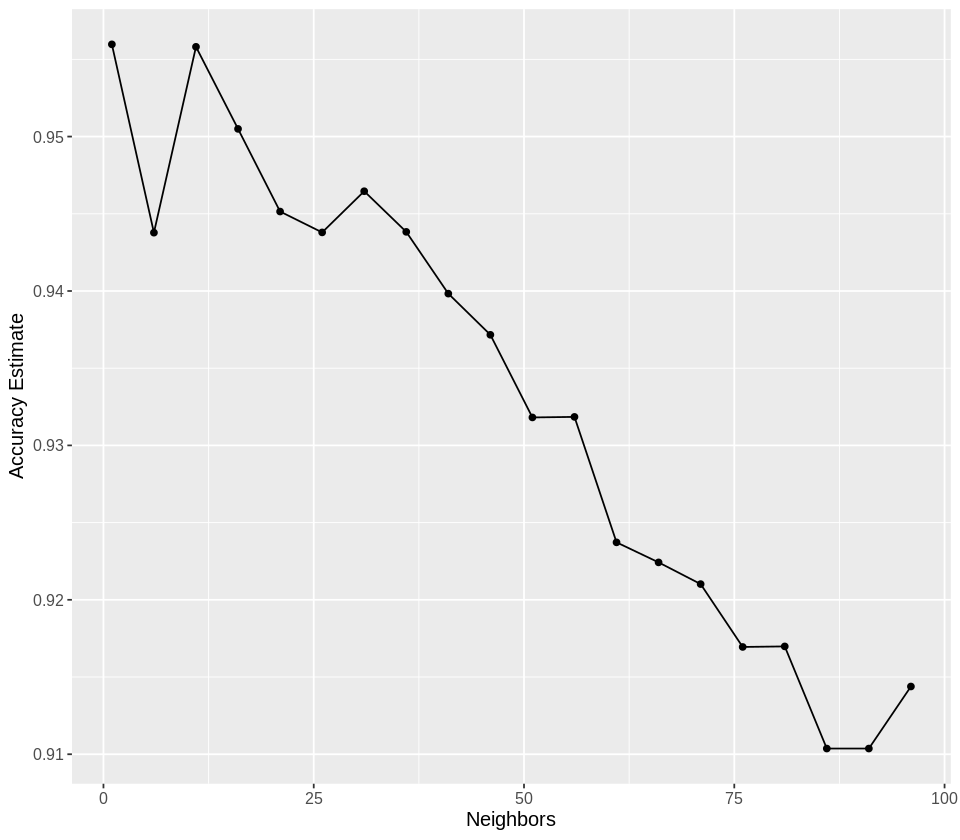

In [27]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Accuracy Estimate") +
                    theme(text = element_text(size = 12))

accuracy_vs_k